In [1]:
import mpl_toolkits
from mpl_toolkits import mplot3d
#base environment
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

from mpl_toolkits.mplot3d import axes3d

import os

In [86]:
#if movies are in lots of different folders
file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
# folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output'
folderpath='/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

    ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             1             1                 NaN                    NaN   
1             2             1                 NaN                    NaN   
2             3             1                 NaN                    NaN   
3             4             1                 NaN                    NaN   
4             5             1                 NaN                    NaN   
..          ...           ...                 ...                    ...   
71          107             1                 NaN                    NaN   
72          108             1                 NaN                    NaN   
73          109             1                 NaN                    NaN   
74          115             1                 NaN                    NaN   
75          116             1                 NaN                    NaN   

    Metadata_Format1  Metadata_Format2  Metadata_Frame  Metadata_Series  \
0           

In [87]:
#Combining SP and DP
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')


      ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0               1             1                 NaN                    NaN   
1               1             2                 NaN                    NaN   
2               2             1                 NaN                    NaN   
3               2             2                 NaN                    NaN   
4               3             1                 NaN                    NaN   
...           ...           ...                 ...                    ...   
1224          107             1                 NaN                    NaN   
1225          108             1                 NaN                    NaN   
1226          109             1                 NaN                    NaN   
1227          115             1                 NaN                    NaN   
1228          116             1                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2  Metadata_Frame  Metad

In [88]:
#IMPORTING THE MICE METADATA
#date must be in the format of YYYY-MM-DD=> change manually in excell
metadata=pd.read_csv('/Users/secchim/Documents/230210_VWF_078_metadata_merged.csv')

metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')
print(metadata['Metadata_VWF'])

# data['Metadata_VWF']=(data['Metadata_VWF']).str.replace('_movie_','_')
print(data['Metadata_VWF'])
data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
print(len(data))

0                  VWF_078_MS230119_M1_tilescan_Day0_TR1
1      VWF_078_MS230119_M1_tilescan_Day0-Stitching-01...
2      VWF_078_MS230119_M1_tilescan_Day0-Stitching-01...
3                  VWF_078_MS230120_M1_tilescan_Day1_TR1
4                     VWF_078_MS230120_M1_zstack_Day1_P2
                             ...                        
98                          VWF_078_MS230123_M6_movie_P3
99                          VWF_078_MS230123_M6_movie_P7
100                         VWF_078_MS230123_M6_movie_P6
101                         VWF_078_MS230123_M6_movie_P4
102                         VWF_078_MS230123_M6_movie_P5
Name: Metadata_VWF, Length: 103, dtype: object
0       VWF_078_MS230123_M5_movie_P3
1       VWF_078_MS230123_M5_movie_P3
2       VWF_078_MS230123_M5_movie_P3
3       VWF_078_MS230123_M5_movie_P3
4       VWF_078_MS230123_M5_movie_P3
                    ...             
1224    VWF_078_MS230123_M5_movie_P8
1225    VWF_078_MS230123_M5_movie_P8
1226    VWF_078_MS230123_M5_mo

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3952524189.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['Metadata_VWF']=(metadata['Position_Name']).str.replace('.czi_','_')


In [30]:
data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')

In [89]:
#TRACK ID IS UNIQUE PER CELL PER MOVIE
data['Track_ID'] = 'X'
data['Track_ID']=(data['Metadata_VWF']) +'_'+((data['Intensity_MaxIntensity_track']).astype(str))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/KuOTrackingRemovedObjectsSPbin.csv', index=False)

#REMOVE CELLS THAT WERE NOT TRACKED IN TRACKMATE
print(data.index)
data= data[data['Intensity_MaxIntensity_track'] != 0] #worked
print(data.index)
print(data)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228],
           dtype='int64', length=1229)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228],
           dtype='int64', length=1229)
      ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0               1             1                 NaN                    NaN   
1               1             2                 NaN                    NaN   
2               2             1                 NaN                    NaN   
3               2             2                 NaN                    NaN   
4               3             1                 NaN                    NaN   
...           ...           ...                 ...                    ...   
1224          107             1                 NaN   

In [90]:
#time per timepoint
from datetime import datetime
from datetime import timedelta
# print(str(data['AcquisitionDate']),str(data['AcquisitionTime']))
#https://docs.python.org/3/library/datetime.html#timedelta-objects

#Acquisition date must be in the format of YYYY-MM-DD=> change manually in excell if needed
#Run this line to correct for the weird Zen format
data['AcquisitionTime']=data['AcquisitionTime'].str[:8]
# print(data['AcquisitionTime_x'])
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')
# data=pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')

for i in data.index:
    data.loc[i, 'Timeframe_Time']=(datetime.fromisoformat(str(data.loc[i, 'AcquisitionDate']+' '+data.loc[i, 'AcquisitionTime'])))+timedelta(minutes=int(3*(data.loc[i, 'Metadata_Timepoint'])))
# data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')


In [91]:
#NORMALIZING POSITIONS TO THE FIRST COORDINATES
#do on the unique Cell_ID rather than Track_ID
#PROBLEM OF I DONT HAVE THE Z FOR THE STAGE POSITION
data['corrected_x_2']=data['Location_Center_X']
data['corrected_y_2']=data['Location_Center_Y']
data['corrected_z_2']=data['Location_Center_Z']
data['norm_x']=0
grouped=data.groupby(['Track_ID'])

dflist=[]
print(grouped)
for i, newdf in grouped:
    newdf2=newdf[newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]#or '0'?
    norm_x=newdf2['Location_Center_X'].values
    norm_y=newdf2['Location_Center_Y'].values
    norm_z=newdf2['Location_Center_Z'].values

    newdf['norm_x']=[norm_x[0]]*len(newdf)#you could create pd.Series
    # print(newdf['norm_x'])
    newdf['corrected_x_2']=((newdf['Location_Center_X']-newdf['norm_x'])*(newdf['Scale_X'])*1000000)
    # print(newdf['corrected_x_2'])
    newdf['norm_y']=[norm_y[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_y_2']=((newdf['Location_Center_Y']-newdf['norm_y'])*(newdf['Scale_Y'])*1000000)
    newdf['norm_z']=[norm_z[0]]*len(newdf)#you could create pd.Series
    newdf['corrected_z_2']=((newdf['Location_Center_Z']-newdf['norm_z'])*(newdf['Scale_Z'])*1000000)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3767451163.py:12: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


      ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
21              1             1                 NaN                    NaN   
22              2             1                 NaN                    NaN   
23              3             1                 NaN                    NaN   
24              4             1                 NaN                    NaN   
25              5             1                 NaN                    NaN   
...           ...           ...                 ...                    ...   
1080          117             8                 NaN                    NaN   
1092          118             9                 NaN                    NaN   
1103          119             9                 NaN                    NaN   
1120          120             8                 NaN                    NaN   
1141          121            10                 NaN                    NaN   

      Metadata_Format1  Metadata_Format2  Metadata_Frame  Metad

In [92]:
#added these lines when not calculating FINAL CELL ID
data['Cell_group']=data['FileID']+'_'+data['Cell_name']
data['Final_Cell_ID']=data['Track_ID']
######
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
#sorting values so the next frame is accurate
for i, newdf in grouped:
    newdf=newdf.sort_values(by=['Timeframe_Time'])
    print(newdf['Timeframe_Time'])
    dflist.append(newdf)
data=pd.concat(dflist)   

#Step adding the location of the next frame to do the normalization
#shift takes the next row(?) and puts it in the current row
data["corrected_x_2_next"] = data["corrected_x_2"].shift(-1)
data["corrected_y_2_next"] = data["corrected_y_2"].shift(-1)
data["corrected_z_2_next"] = data["corrected_z_2"].shift(-1)
print(data["corrected_x_2_next"], data ["corrected_x_2"])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3015435569.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21   2023-01-23 11:01:08
22   2023-01-23 11:04:08
23   2023-01-23 11:07:08
24   2023-01-23 11:10:08
25   2023-01-23 11:13:08
26   2023-01-23 11:16:08
28   2023-01-23 11:19:08
29   2023-01-23 11:22:08
30   2023-01-23 11:25:08
31   2023-01-23 11:28:08
32   2023-01-23 11:31:08
34   2023-01-23 11:34:08
37   2023-01-23 11:37:08
40   2023-01-23 11:40:08
42   2023-01-23 11:43:08
45   2023-01-23 11:46:08
48   2023-01-23 11:49:08
51   2023-01-23 11:52:08
54   2023-01-23 11:55:08
57   2023-01-23 11:58:08
60   2023-01-23 12:01:08
Name: Timeframe_Time, dtype: datetime64[ns]
0    2023-01-23 11:01:08
2    2023-01-23 11:04:08
4    2023-01-23 11:07:08
6    2023-01-23 11:10:08
8    2023-01-23 11:13:08
27   2023-01-23 11:16:08
11   2023-01-23 11:19:08
13   2023-01-23 11:22:08
15   2023-01-23 11:25:08
17   2023-01-23 11:28:08
19   2023-01-23 11:31:08
35   2023-01-23 11:34:08
38   2023-01-23 11:37:08
20   2023-01-23 11:40:08
43   2023-01-23 11:43:08
46   2023-01-23 11:46:08
49   2023-01-23 11:49:08
52   2

In [93]:
import math #if import math not loaded this cell won't work

#annotate the last timeframe 
data["Last_timepoint"]=True
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, "Timeframe_Time"])== (newdf['Timeframe_Time'].max()):
                newdf.loc[b, "Last_timepoint"]=True
            else:
                newdf.loc[b, "Last_timepoint"]=False
    dflist.append(newdf)
data=pd.concat(dflist)              
# print(data)

# calculate distance between timeframes
data['distance']= None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
                # print(b, newdf.loc[b, "Timeframe_Time"], newdf.loc[b,'Final_Cell_ID'], newdf.loc[b,'Metadata_Timepoint'], newdf.shape[0]-1)
                # try:
                newdf.loc[b, "distance"]=(math.sqrt((newdf.loc[b, "corrected_x_2"]-newdf.loc[b, "corrected_x_2_next"])**2+(newdf.loc[b, "corrected_y_2"]-newdf.loc[b, "corrected_y_2_next"])**2+(newdf.loc[b, "corrected_z_2"]-newdf.loc[b, "corrected_z_2_next"])**2))
                    # newdf["distance"]=(math.sqrt((newdf["corrected_x_2"][r]-newdf["corrected_x_2"][r+1])**2+(newdf["corrected_y_2"][r]-newdf["corrected_y_2"][r+1])**2+(newdf["corrected_z_2"][r]-newdf["corrected_z_2"][r+1])**2))
                # except:
                    # print(i, b, "error")
                    # newdf.loc[b, "distance"]='NaN'
                    # pass
        # print(newdf["distance"])
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['distance'])
#.sort_values(by=['Timeframe_Time']).reset_index()




/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3019793773.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3019793773.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21       1.015899
22       1.482274
23       2.344777
24       1.507389
25       1.409179
          ...    
1080     1.702906
1092     2.435493
1103     2.175241
1120    11.179379
1141         None
Name: distance, Length: 1229, dtype: object


In [94]:
#Calculate track length
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf.dropna()
    newdf['track_length']=newdf['distance'].sum()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['track_length'])   

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/2701469315.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21      26.889975
22      26.889975
23      26.889975
24      26.889975
25      26.889975
          ...    
1080    40.737942
1092    40.737942
1103    40.737942
1120    40.737942
1141    40.737942
Name: track_length, Length: 1229, dtype: float64


In [95]:
#calculate displacement for every timepoint
data['displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    stored_X0=newdf['corrected_x_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Y0=newdf['corrected_y_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    stored_Z0=newdf['corrected_z_2'][newdf['Metadata_Timepoint'] == (newdf['Metadata_Timepoint']).min()]
    for b, r in newdf.iterrows():
        newdf.loc[b, "displacement"]=math.sqrt((newdf["corrected_x_2"][b]-stored_X0)**2+(newdf["corrected_y_2"][b]-stored_Y0)**2+(newdf["corrected_z_2"][b]-stored_Z0)**2)
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['displacement'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/4218996381.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21            0.0
22       1.015899
23       1.770853
24        1.18787
25       1.350592
          ...    
1080     5.779569
1092     4.104655
1103     3.089013
1120     4.741286
1141    14.521624
Name: displacement, Length: 1229, dtype: object


In [96]:
#maximum displacement
data['max_displacement']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['max_displacement']=newdf['displacement'].max()
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['max_displacement'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/2756133412.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21       3.723510
22       3.723510
23       3.723510
24       3.723510
25       3.723510
          ...    
1080    14.521624
1092    14.521624
1103    14.521624
1120    14.521624
1141    14.521624
Name: max_displacement, Length: 1229, dtype: float64


In [97]:
#mean speed in um/sec
#potentially wrong
#gives NaN for cells that have only one timepoint so these cells were removed in the if statement


data['mean_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        mean_speed=newdf['track_length']/((newdf['Timeframe_Time'].max()-newdf['Timeframe_Time'].min()).total_seconds())
        newdf['mean_speed']=mean_speed
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['mean_speed'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/434112148.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21      0.007469
22      0.007469
23      0.007469
24      0.007469
25      0.007469
          ...   
1080    0.015088
1092    0.015088
1103    0.015088
1120    0.015088
1141    0.015088
Name: mean_speed, Length: 1229, dtype: object


In [98]:
#This line would be useful if different movies were connected and the time between 2 frames wasn't always 3min
data["Timeframe_Time_next"] = data["Timeframe_Time"].shift(-1)

In [99]:
#frame speed
data=data.drop_duplicates() #why do I have duplicates?
data['frame_speed']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    if newdf.shape[0]>=2:
        for b, r in newdf.iterrows():
            if (newdf.loc[b, 'Last_timepoint'])== False: 
            #if newdf.loc[b,'displacement']>0 and newdf.loc[b+1, 'displacement']>0:
            # try:
                newdf.loc[b, "frame_speed"]=abs(newdf.loc[b,'distance']/((newdf.loc[b,'Timeframe_Time']-newdf.loc[(b),'Timeframe_Time_next']).total_seconds()))
            # except:
                # newdf.loc[b, "frame_speed"]='NaN'
            # print(b, newdf["frame_speed"])
                # pass
            # else:
                # print(b, 'error')
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['frame_speed'])

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/2036998357.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21      0.005644
22      0.008235
23      0.013027
24      0.008374
25      0.007829
          ...   
1080    0.009461
1092    0.013531
1103    0.012085
1120    0.062108
1141        None
Name: frame_speed, Length: 1229, dtype: object


In [100]:
#linearity coefficient

data['linearity_coefficient']=None
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['linearity_coefficient']=newdf['max_displacement']/newdf['track_length']
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['linearity_coefficient'])


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/170172036.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21      0.138472
22      0.138472
23      0.138472
24      0.138472
25      0.138472
          ...   
1080    0.356464
1092    0.356464
1103    0.356464
1120    0.356464
1141    0.356464
Name: linearity_coefficient, Length: 1229, dtype: float64


In [101]:
#arrest coefficient
#speed<2/60um/sec

# data=data.dropna(axis=0)
#First classifying timeframes as arrested or not
data['arrested']=False
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    for b, r in newdf.iterrows():
        # print((newdf.loc[b,'mean_speed']),2/60, b)
        # print(newdf.loc[b])
        if (newdf.loc[b,'frame_speed'])!=None and (newdf.loc[b,'frame_speed'])<(2/60): #different from NaN
            newdf.loc[b,'arrested']=True
        else :
            newdf.loc[b,'arrested']=False
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrested'])

# LOTS OF DUPLICATES CREATED? WHEN ? #I think because of df list in the wrong place
datax=data.drop_duplicates()

data['arrest_coefficient']=False
data=data.drop_duplicates()
grouped=data.groupby(['Final_Cell_ID'])
dflist=[]
for i, newdf in grouped:
    newdf2=newdf[newdf['arrested']==True]
    newdf3=newdf[newdf['arrested']==False]
    # print(newdf2['arrested'].shape[0],newdf3['arrested'].shape[0])
    if ((newdf2.shape[0])+(newdf3.shape[0]))>1:
        newdf['arrest_coefficient']=(newdf2.shape[0])/((newdf2.shape[0])+(newdf3.shape[0]))
    dflist.append(newdf)
data=pd.concat(dflist)
print(data['arrest_coefficient'])

# datax.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/arrest_coef.csv')



/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/49191078.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21       True
22       True
23       True
24       True
25       True
        ...  
1080     True
1092     True
1103     True
1120    False
1141    False
Name: arrested, Length: 1229, dtype: bool


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/49191078.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


21      0.952381
22      0.952381
23      0.952381
24      0.952381
25      0.952381
          ...   
1080    0.785714
1092    0.785714
1103    0.785714
1120    0.785714
1141    0.785714
Name: arrest_coefficient, Length: 1229, dtype: object


In [102]:
number_of_cells=data['Final_Cell_ID'].unique()
print(len(number_of_cells))

data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv')

394


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3811713125.py:22: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/3811713125.py:88: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


['VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P5_7.629510946571827e-05'
 'VWF_078_MS230123_M5_movie_P6_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P8_0.0001525902189314']
VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_0.000106813153252
VWF_078_MS230123_M5_movie_P4_0.0001983672846108
VWF_078_MS230123_M5_movie_P4_0.000213626306504
VWF_078_MS230123_M5_movie_P4_0.0002288853283971
VWF_078_MS230123_M5_movie_P4_0.0002441443502902
VWF_078_MS230123_M5_movie_P4_0.0003814755473285
VWF_078_MS230123_M5_movie_P4_0.0004119935911148
VWF_078_MS230123_M5_movie_P4_0.0004882887005805
VWF_078_MS230123_M5_movie_P4_0.00053406576626
VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_7.629510946571

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='track_length'>

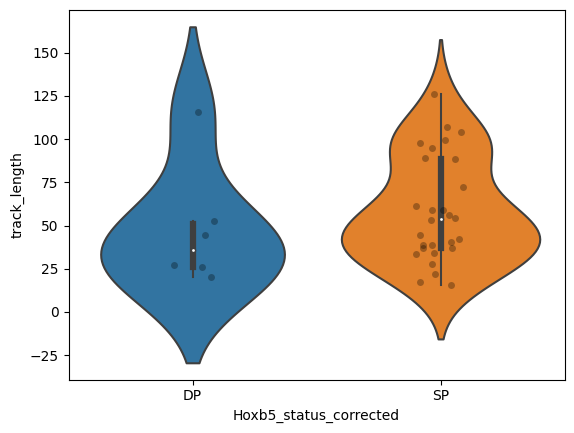

In [110]:
#PLOTTING RESULTS of track length

import statistics
import seaborn as sns

#Either:
# datax=data
#Or
data= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/old_movie_output/combined_data.csv", header = 0)
data.dropna()
count_DP=0

#DP/SP Hoxb5_status
Hoxb5_cells=[]
Hoxb5Vwf_cells=[]

# print(len(data))
#CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
#SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
grouped=data.groupby(['Final_Cell_ID'])
# print(grouped)
for i, newdf in grouped:
    newdf=newdf[newdf['Hoxb5_status'] == 'DP']
    # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
    count_DP=newdf.shape[0]
    # print(count_DP)
    # if count_DP > (len(newdf.index))/2:
    if count_DP > 4:#was 3
        Hoxb5Vwf_cells.append(i) #137
# # print(Hoxb5Vwf_cells)
    # dflist.append(newdf)
# datax=pd.concat(dflist)

Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
print(Hoxb5Vwf_list)


datax=data
datax['Hoxb5_status_corrected']='SP'
for i in datax.index:
    if datax.loc[i,'Final_Cell_ID'] in Hoxb5Vwf_list:
        datax.loc[i,'Hoxb5_status_corrected']='DP'
        # print('DP', i)
    # else:
        # datax.loc[i,'Hoxb5_status_corrected']='SP'
        # print('SP', i)
# print(datax)
# print(len(datax))
# dx=datax.drop_duplicates()
# print(len(dx))
# print(dx['Relative_treatment_Time']=='na')



#IS THIS THE RIGHT PLACE FOR IT?
# #CONSIDERS CELLS TO BE DP IF LABELLED AS DP IN 3 FRAMES MINIMUM
# #SHOULD PROBABLY BE DONE ON THE FINAL CELL_ID RATHER THAN TRACK ID
# grouped=data.groupby(['Final_Cell_ID'])
# # print(grouped)
# for i, newdf in grouped:
#     newdf=newdf[newdf['Hoxb5_status'] == 'DP']
#     # newdf=newdf[newdf['MK_distance']>2] #ADD THIS NEW LINE!!!!!!
#     count_DP=newdf.shape[0]
#     # print(count_DP)
#     # if count_DP > (len(newdf.index))/2:
#     if count_DP > 3:
#         Hoxb5Vwf_cells.append(i) #137
# # # print(Hoxb5Vwf_cells)

# Hoxb5Vwf_list=np.unique(Hoxb5Vwf_cells)
# # print(Hoxb5Vwf_list)

# grouped=data.groupby(['Final_Cell_ID'])
# for i, newdf in grouped:
#     if i in Hoxb5Vwf_list:
#         newdf['Hoxb5_status_corrected']='DP'
#     else:
#         newdf['Hoxb5_status_corrected']='SP'
#     dflist.append(newdf)
# data=pd.concat(dflist)

# https://datavizpyr.com/boxplots-with-points-using-seaborn-in-python/
#https://seaborn.pydata.org/generated/seaborn.stripplot.html
datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'track_length']]#or datax

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)
# print(len(datab))


dx=datab.drop_duplicates()
dx=dx[dx['track_length']!=0]

# print(dx)
sns.stripplot(x=('Hoxb5_status_corrected'), y="track_length", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x=('Hoxb5_status_corrected'), y="track_length", data=dx, )

In [109]:
#NOT NECESSARY HERE BECAUSE ALL MOVIES WERE 1H - NOT OPTIMIZED, DOESNT WORK

#ONLY RUN ONCE OTHERWISE TRACKED COEFFICIENT CHANGES!!!

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement', 'Nframes']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=8:#was 11
        df_list.append(newdf)
        print(i)
datab=pd.concat(df_list)

df_list =[]
datab['Tracked_coefficient']=None
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    newdf['Track_length_in_timepoint']=newdf.shape[0]
    for r in newdf.index:
        newdf.loc[r, 'Tracked_coefficient']=newdf.loc[r,'Track_length_in_timepoint']/newdf.loc[r,'Nframes']
    df_list.append(newdf)
datab=pd.concat(df_list)
# print(len(datab))
# datay=datax.groupby("Final_Cell_ID").agg([np.mean,np.std])
# print(datay)
# print(datab['Tracked_coefficient'])

# dx=datax.groupby(['Final_Cell_ID'])
# print(dx)
# for grouping_item, grouped_df in dx:
    # sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="track_length", data=grouped_df)
    # sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="track_length", data=grouped_df, dodge=True, color='black', alpha=0.3)

dx=datab.drop_duplicates()
# # print(dx)
# sns.boxplot(x=("Treatment"), hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx,  order =['homeostasis','plt_depletion','24h_depletion'], showfliers = False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y='Track_length_in_timepoint', data=dx, dodge=True, color='black', alpha=0.3,  order =['homeostasis','plt_depletion','24h_depletion'])


sns.stripplot(x=('Hoxb5_status_corrected'),y='Tracked_coefficient', data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y='Tracked_coefficient', data=dx)


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1389356185.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1389356185.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_0.000106813153252
VWF_078_MS230123_M5_movie_P4_0.0001983672846108
VWF_078_MS230123_M5_movie_P4_0.000213626306504
VWF_078_MS230123_M5_movie_P4_0.0002288853283971
VWF_078_MS230123_M5_movie_P4_0.0002441443502902
VWF_078_MS230123_M5_movie_P4_0.0003356984816491
VWF_078_MS230123_M5_movie_P4_0.0003814755473285
VWF_078_MS230123_M5_movie_P4_0.0004119935911148
VWF_078_MS230123_M5_movie_P4_0.0004882887005805
VWF_078_MS230123_M5_movie_P4_0.00053406576626
VWF_078_MS230123_M5_movie_P4_0.0005493247881531
VWF_078_MS230123_M5_movie_P4_0.0005951018538326
VWF_078_MS230123_M5_movie_P4_0.000640878919512
VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_6.103608757257462e-05
VWF_078_MS230123_M5_movie_P4_7.629510946571827e-05
VWF_078_MS230123_M5_movie_P4_9.155413135886192e-05
VWF_078_MS230123_M5_mov

ValueError: object arrays are not supported

VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_0.000106813153252
VWF_078_MS230123_M5_movie_P4_0.0001983672846108
VWF_078_MS230123_M5_movie_P4_0.000213626306504
VWF_078_MS230123_M5_movie_P4_0.0002288853283971
VWF_078_MS230123_M5_movie_P4_0.0002441443502902
VWF_078_MS230123_M5_movie_P4_0.0003814755473285
VWF_078_MS230123_M5_movie_P4_0.0004119935911148
VWF_078_MS230123_M5_movie_P4_0.0004882887005805
VWF_078_MS230123_M5_movie_P4_0.00053406576626
VWF_078_MS230123_M5_movie_P4_4.577706567943096e-05
VWF_078_MS230123_M5_movie_P4_7.629510946571827e-05
VWF_078_MS230123_M5_movie_P4_9.155413135886192e-05
VWF_078_MS230123_M5_movie_P5_0.0001983672846108
VWF_078_MS230123_M5_movie_P5_0.000213626306504
VWF_078_MS230123_M5_movie_P5_0.0002288853283971
VWF_078_MS230123_M5_movie_P5_0.0002594033721834
VWF_078_MS230123_M5_movie_P5_0.0002899214159697
VWF_078_MS230123_M5_movie_

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1523272312.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='max_displacement'>

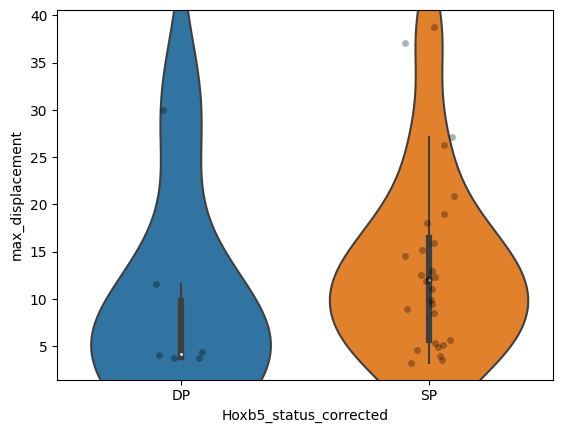

In [111]:
#PRINT MAXIMUM DISPLACEMENT

datab=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'max_displacement']]
# print(len(datab))

df_list =[]
grouped=datab.groupby(['Final_Cell_ID'])
for i, newdf in grouped:
    if len(newdf.index) >=11:
        print(i)
        df_list.append(newdf)
datab=pd.concat(df_list)

dx=datab.drop_duplicates()
dx=dx[dx['max_displacement']!=0]
# print(dx)
sns.violinplot(x='Hoxb5_status_corrected', y="max_displacement", data=dx)
sns.stripplot(x='Hoxb5_status_corrected', y="max_displacement", data=dx, dodge=True, color='black', alpha=0.3)


In [ ]:

###FRAME SPEED VIOLIN PLOT
dx=datax[datax['frame_speed']!=0]
dx.dropna()
sns.stripplot( x='Hoxb5_status_corrected', y="frame_speed", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="frame_speed", data=dx)


<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='distance'>

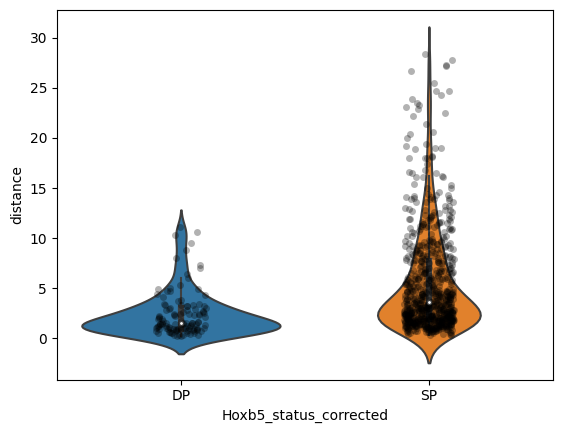

In [117]:
#QC plot
# 
dx=datax[datax['max_displacement']!=0]

dx.dropna()

##DISTANCE VIOLIN PLOT
sns.stripplot( x='Hoxb5_status_corrected', y="distance", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="distance", data=dx)


                                          Final_Cell_ID        Treatment  \
0     VWF_078_MS230123_M5_movie_P3_1.525902189314365...  old_homeostasis   
21    VWF_078_MS230123_M5_movie_P3_3.051804378628731...  old_homeostasis   
42    VWF_078_MS230123_M5_movie_P3_4.577706567943096...  old_homeostasis   
63       VWF_078_MS230123_M5_movie_P4_0.000106813153252  old_homeostasis   
82      VWF_078_MS230123_M5_movie_P4_0.0001220721751451  old_homeostasis   
...                                                 ...              ...   
1157  VWF_078_MS230123_M5_movie_P8_3.051804378628731...  old_homeostasis   
1171  VWF_078_MS230123_M5_movie_P8_4.577706567943096...  old_homeostasis   
1192  VWF_078_MS230123_M5_movie_P8_6.103608757257462...  old_homeostasis   
1194  VWF_078_MS230123_M5_movie_P8_7.629510946571827...  old_homeostasis   
1215  VWF_078_MS230123_M5_movie_P8_9.155413135886192...  old_homeostasis   

     Hoxb5_status_corrected  arrest_coefficient  max_displacement  
0                  

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='arrest_coefficient'>

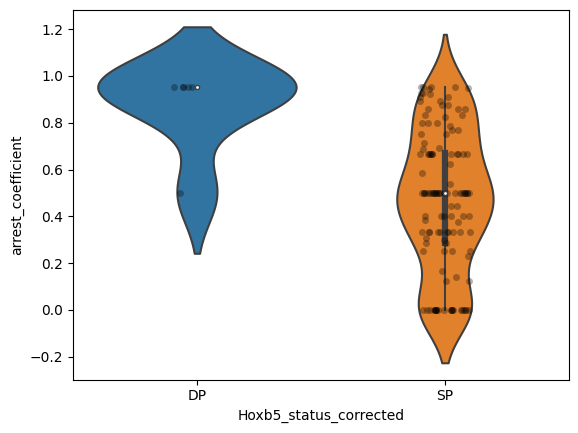

In [127]:
#ARREST COEFFICIENT VIOLIN PLOT

dx=datax[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'arrest_coefficient', 'max_displacement']]
#WASN'T WORKING BECAUSE SOME FALSE 
dx=dx[dx['arrest_coefficient']!='FALSE']
dx=dx[dx['arrest_coefficient']!='false']
dx=dx[dx['arrest_coefficient']!='False']

#THIS LINE EXCLUDES THE CELLS THAT ARE NOT REALLY MOVING
# dx=dx[dx['max_displacement']>10]
dx.dropna()
dx = dx.astype({"arrest_coefficient": np.float16})
dx=dx.drop_duplicates()
print(dx)
sns.stripplot( x='Hoxb5_status_corrected', y="arrest_coefficient", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="arrest_coefficient", data=dx)

<AxesSubplot: xlabel='Hoxb5_status_corrected', ylabel='linearity_coefficient'>

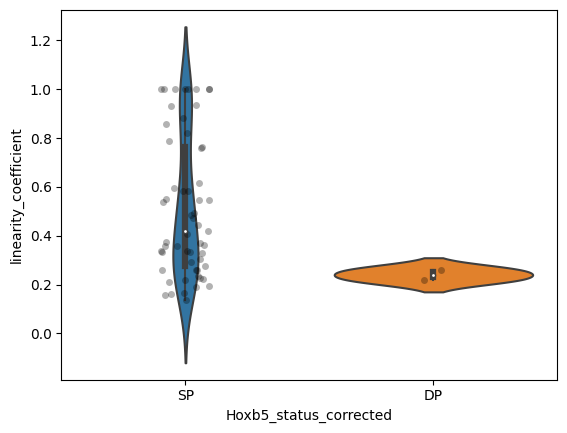

In [132]:
##LINEARITY COEFFICIENT VIOLIN PLOT
dx=data[['Final_Cell_ID', 'Treatment', 'Hoxb5_status_corrected', 'linearity_coefficient','max_displacement']]
dx.dropna()
#THIS LINE EXCLUDES THE CELLS THAT ARE NOT REALLY MOVING
dx=dx[dx['max_displacement']>10]
dx=dx.drop_duplicates()
sns.stripplot( x='Hoxb5_status_corrected', y="linearity_coefficient", data=dx, dodge=True, color='black', alpha=0.3)
sns.violinplot(x='Hoxb5_status_corrected', y="linearity_coefficient", data=dx)


['VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05'
 'VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05'
 'VWF_078_MS230123_M5_movie_P5_7.629510946571827e-05'
 'VWF_078_MS230123_M5_movie_P6_1.5259021893143654e-05'
 'VWF_078_MS230123_M5_movie_P8_0.0001525902189314']
VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05 no problem
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05 no problem
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05 no problem
VWF_078_MS230123_M5_movie_P4_0.000106813153252 no problem
VWF_078_MS230123_M5_movie_P4_0.0001220721751451 PBM
VWF_078_MS230123_M5_movie_P4_0.0001373311970382 PBM
VWF_078_MS230123_M5_movie_P4_0.0001678492408245 PBM
VWF_078_MS230123_M5_movie_P4_0.0001831082627177 PBM
VWF_078_MS230123_M5_movie_P4_0.0001983672846108 no problem
VWF_078_MS230123_M5_movie_P4_0.000213626306504 PBM
VWF_078_MS230123_M5_movie_P4_0.0002288853283971 PBM
VWF_078_MS230123_M5_movie_P4_0.0002441443502902 PBM
VWF_078_M

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/2961232864.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


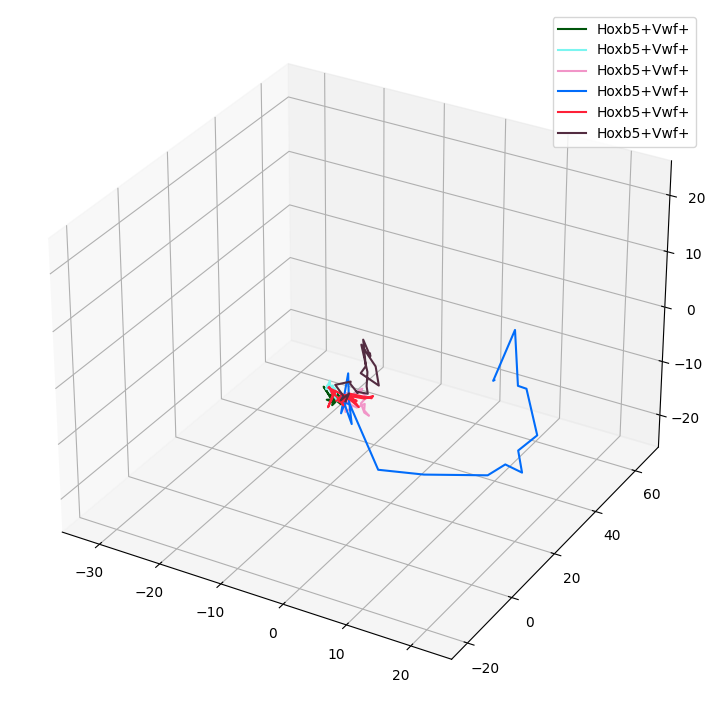

In [137]:
### homeostasis plot, separating Hoxb5+Vwf+

data=datax
#DELETE THESE LINES BECAUSE FILTERED BEFORE?
#removing TRACKS THAT ARE TOO SHORT
print(Hoxb5Vwf_list)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=16:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#Plotting the tracks 

for a in Hoxb5Vwf_list:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list:# and a not in my_list_hoxb5:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf+', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper right')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)


VWF_078_MS230123_M5_movie_P3_1.5259021893143654e-05 no problem
VWF_078_MS230123_M5_movie_P3_3.051804378628731e-05 no problem
VWF_078_MS230123_M5_movie_P3_4.577706567943096e-05 no problem
VWF_078_MS230123_M5_movie_P4_0.000106813153252 no problem
VWF_078_MS230123_M5_movie_P4_0.0001220721751451 PBM
VWF_078_MS230123_M5_movie_P4_0.0001373311970382 PBM
VWF_078_MS230123_M5_movie_P4_0.0001678492408245 PBM
VWF_078_MS230123_M5_movie_P4_0.0001831082627177 PBM
VWF_078_MS230123_M5_movie_P4_0.0001983672846108 no problem
VWF_078_MS230123_M5_movie_P4_0.000213626306504 no problem
VWF_078_MS230123_M5_movie_P4_0.0002288853283971 no problem
VWF_078_MS230123_M5_movie_P4_0.0002441443502902 no problem
VWF_078_MS230123_M5_movie_P4_0.0002594033721834 PBM
VWF_078_MS230123_M5_movie_P4_0.0002746623940765 PBM
VWF_078_MS230123_M5_movie_P4_0.0002899214159697 PBM
VWF_078_MS230123_M5_movie_P4_0.0003051804378628 PBM
VWF_078_MS230123_M5_movie_P4_0.000320439459756 PBM
VWF_078_MS230123_M5_movie_P4_0.0003356984816491 PBM
V

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_88753/1516326444.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]
New size: [12, 9]


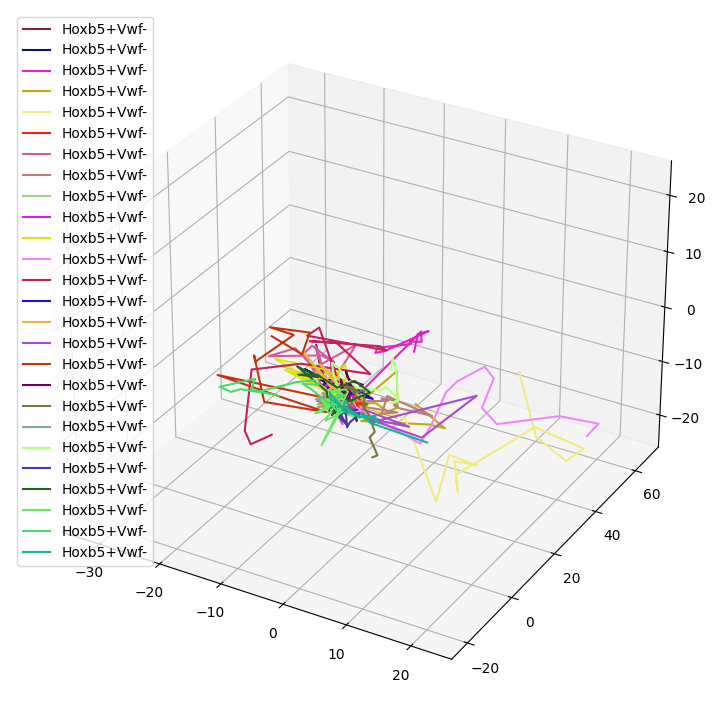

In [136]:
### homeostasis plot, separating Hoxb5+Vwf-


#removing TRACKS THAT ARE TOO SHORT
#print(my_list_hoxb5vwf)
remove_list =[]
grouped=data.groupby(['Track_ID'])
print(grouped)
for i, newdf in grouped:
    if len(newdf.index) <=11:
        print(i,'PBM')
        remove_list.append(i) #137
    else:
        print(i, 'no problem')


# print(len(remove_list))

# remove_list.append(['VWF_043_MS211126_m4-homeostasismovie_2_P7++_3.05e-05', 'VWF_049_MS220201_M1_Snap_movie5depletion_P10spot_1.53e-05'])


print(len(data))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

my_list_hoxb5 = np.unique(data['Track_ID'])
print(len(my_list_hoxb5))

#Plotting the tracks 

for a in my_list_hoxb5:
    data1= data[(data['Track_ID'] == a)].sort_values(by=['Metadata_Timepoint'])#Make sure not a string 
#    if len(data1['Metadata_Timepoint'])>2
    if a not in remove_list and a not in Hoxb5Vwf_list:
        X1= data1['corrected_x_2']
        Y1= data1['corrected_y_2']
        Z1= data1['corrected_z_2']
        r= random.random()
        b= random.random()
        g= random.random()
        ax.plot(X1, Y1, Z1, label='Hoxb5+Vwf-', c=(r,g,b))
        
    #    ax.set_xlim(-15, 20)
    #    ax.set_ylim(-20, 30)
    #    ax.set_zlim(-20, 10)    
        ax.set_xlim(-35, 25)
        ax.set_ylim(-25, 70)
        ax.set_zlim(-25, 25)
        ax.legend(loc='upper left')

        # Set figure width to 12 and height to 9
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 9
        plt.rcParams["figure.figsize"] = fig_size
        print ("New size:", fig_size)
